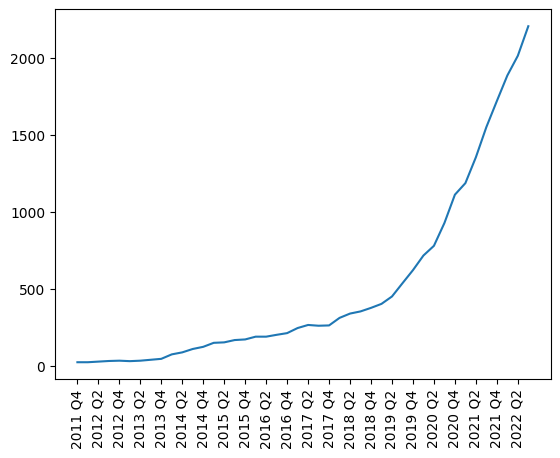

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取表格数据
df = pd.read_excel('car registe.xlsx')
x = sorted(df.columns.tolist())
df = df[x]

# 提取行数据
row_data = df.iloc[2, :-6].tolist()
date_data = sorted(df.columns[:-6].tolist())
# print(date_data)
plt.xticks(range(0, len(date_data), 2), date_data[::2], rotation=90)
plt.plot(date_data,row_data)
plt.show()

In [2]:
# Covid-19封锁对交通的影响是否可以用作计算电动汽车普及和清洁空气区的潜在影响的指标

In [3]:
import pandas as pd

# 读取表格数据
data = pd.read_excel('covid tran.xlsx')

# 筛选出列名为 'column_name'，元素值等于 'target_value' 的行
filtered_data = data[data['Sector'] == 'transit stations']
# filtered_data = data[data['Sector'] == 'parks']

sorted_data = filtered_data.sort_values('Date')
sorted_data['Date'] = pd.to_datetime(sorted_data['Date'])

# 将数据按季度进行分组，并计算每组的平均值
sorted_data = sorted_data.groupby(pd.Grouper(key='Date', freq='Q')).mean()
# sorted_data = sorted_data.index.strftime('%Y-Q%q')
col2 = sorted_data['Percent change from baseline']
# 打印筛选结果
print(col2)


Date
2020-03-31   -21.456522
2020-06-30   -72.670330
2020-09-30   -52.184783
2020-12-31   -57.456522
2021-03-31   -69.566667
2021-06-30   -48.648352
2021-09-30   -40.673913
2021-12-31   -32.413043
2022-03-31   -38.488889
2022-06-30   -33.230769
2022-09-30   -31.032609
2022-12-31   -30.266667
Freq: Q-DEC, Name: Percent change from baseline, dtype: float64


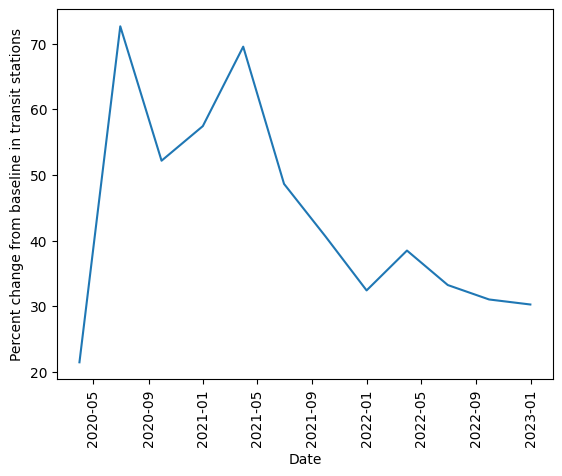

In [4]:
plt.xticks(rotation=90)
plt.plot(sorted_data.index,-col2)
plt.xlabel('Date')
plt.ylabel('Percent change from baseline in transit stations')
plt.show()

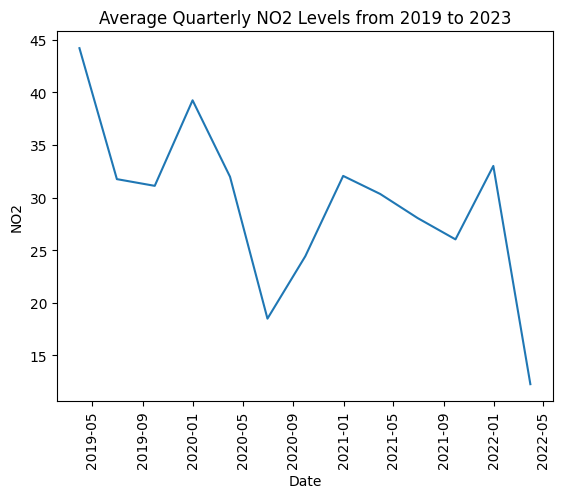

In [5]:
# Filter data by date range
#from date import dateforma
# 判断空气质量与疫情封锁的关系

import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel file
df = pd.read_excel('air quality clean.xlsx')
# df = pd.DataFrame(df)
from datetime import datetime
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2023-12-31')
dates = df['Date']
i = 0
x = []
for d in dates:
    x.append(str(d))
    i = i+1
df = df.loc[(pd.to_datetime(x) >=  pd.to_datetime(start_date, utc=True)) & (pd.to_datetime(x) <= pd.to_datetime(end_date,utc=True))]

#Group data by quarter and compute mean NO2 levels
df['Date'] = pd.to_datetime(df['Date'],utc=False)
df = df.groupby(pd.Grouper(key='Date', freq='Q')).mean()
# df.index
# Extract date and NO2 information
date = df.index
no2 = df['NO2']

# Sort data by date
date, no2 = zip(*sorted(zip(date, no2)))

# Plot the line chart
plt.xticks(rotation=90)
plt.plot(date, no2)
plt.xlabel('Date')
plt.ylabel('NO2')
plt.title('Average Quarterly NO2 Levels from 2019 to 2023')
plt.show()



In [10]:
# 2020年3月23日到8月是第一轮lockdown， 11月到次年3月第二轮
data = pd.read_excel('covid tran.xlsx')

# 筛选出列名为 'column_name'，元素值等于 'target_value' 的行
filtered_data = data[data['Sector'] == 'transit stations']
# filtered_data = data[data['Sector'] == 'parks']

sorted_data = filtered_data.sort_values('Date')

df = pd.read_excel('air quality clean.xlsx')
# df = pd.DataFrame(df)
from datetime import datetime
start_date = pd.to_datetime('2019-10-01')
end_date = pd.to_datetime('2022-12-31')
dates = df['Date']
i = 0
x = []
for d in dates:
    x.append(str(d))
    i = i+1
df = df.loc[(pd.to_datetime(x) >=  pd.to_datetime(start_date, utc=True)) & (pd.to_datetime(x) <= pd.to_datetime(end_date,utc=True))]

#Group data by quarter and compute mean NO2 levels
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)
filtered_data['Date'] = pd.to_datetime(filtered_data['Date']).dt.tz_localize(None)
v1 = filtered_data
v2 = df

# Group the merged DataFrame by date and calculate the correlation between Variable1 and Variable2 for each date
merged_df = pd.merge(v1, v2, on='Date', how='inner')
print(merged_df)
# merged_df.dropna(inplace=True)
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%Y-%m-%d')
# print(merged_df)
# Calculate the correlation between the two variables for each unique date
# c1 = merged_df['NOx']
# c2 = merged_df['Percent change from baseline']
# corr = c1.corr(c2)
# data_corr = {'NOx': merged_df['NOx'], 'Percent change from baseline': merged_df['Percent change from baseline'], 'NO2': merged_df['NO2']}
# corr2 = pd.DataFrame(data_corr)
# print(corr2)
# corr_2 = np.corrcoef(corr2)
# print(corr_2)
# # corr2 = np.corrcoef(merged_df[2:],rowvar=False)
# print(corr)

C:\Users\admin\AppData\Local\Temp\ipykernel_15596\3771629166.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date']).dt.tz_localize(None)


           Date            Sector  Percent change from baseline  \
0    2020-02-15  transit stations                            -9   
1    2020-02-15  transit stations                            -9   
2    2020-02-15  transit stations                            -9   
3    2020-02-15  transit stations                            -9   
4    2020-02-16  transit stations                            -1   
...         ...               ...                           ...   
3095 2021-12-08  transit stations                           -36   
3096 2021-12-29  transit stations                           -57   
3097 2021-12-29  transit stations                           -57   
3098 2021-12-29  transit stations                           -57   
3099 2021-12-29  transit stations                           -57   

                      Date Time       NOx      NO2        NO  SiteID    PM10  \
0     2020-02-15T00:00:00+00:00   37.9153  30.3131    4.9256     215     NaN   
1     2020-02-15T00:00:00+00:00   6

In [ ]:
# A correlation coefficient of 0.1045560021917781 indicates a weak positive correlation between two variables. 
# The magnitude of a correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 
# 1 indicating a perfect positive correlation, and 0 indicating no correlation. Therefore, 
# a correlation coefficient of 0.1045560021917781 indicates that there is some positive correlation between the two variables, 
# but the correlation is not very strong.

# Whether a correlation coefficient is considered "very strong" or not depends on the context of the analysis and the field of study. 
# In some fields, a correlation coefficient of 0.1 may be considered strong, while in others it may be considered weak. 
# It's important to remember that correlation does not imply causation, and 
# that other factors may be influencing the relationship between the two variables being compared. 
# Therefore, it's important to consider other statistical measures and perform a thorough analysis of the data to draw meaningful conclusions.

In [33]:
c1 = merged_df['NOx']
c2 = merged_df['Percent change from baseline']
corr = c1.corr(c2)
data_corr = { 'Percent change from baseline': c2,'NO2': merged_df['NO2'],'NOx':c1}
corr2 = pd.DataFrame(data_corr)
corr_2 = corr2.corr()
print(corr_2)

                              Percent change from baseline       NO2       NOx
Percent change from baseline                      1.000000  0.104556  0.103194
NO2                                               0.104556  1.000000  0.847653
NOx                                               0.103194  0.847653  1.000000


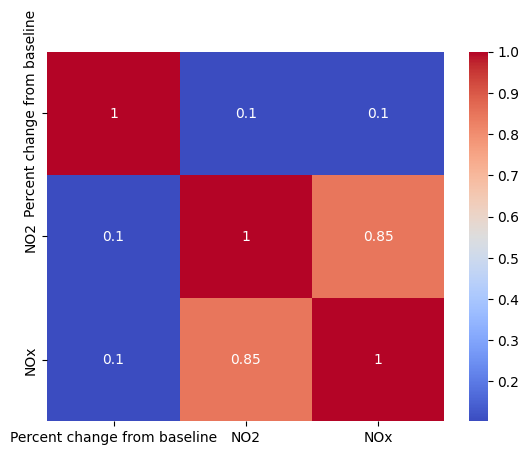

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_2, annot=True, cmap='coolwarm')
plt.show()